
Quantitative analysis using pynance and TaLib
Load yfinance dataset
Fetch Financial Data

We can use PyNance to fetch historical stock data.

In [6]:
import sys, os
import pandas as pd
# Add the 'scripts' directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

from fetch_stock_data import fetch_historical_data

# extract multiple datasets  and concatenate in one dataset for analysis
# List of stocks
stocks = ['AAPL','AMZN','GOOG','META', 'MSFT', 'NVDA','TSLA']
# Fetch historical data for list of stocks

 # Fetch data for AAPL, GOOGL, and MSFT, etc
df = fetch_historical_data(stocks, start_date='2010-01-01', end_date='2023-01-01')
    
# Explore the results
df.head()

,Open,High,Low,Close,Volume,stock
Date,,,,,,
2022-12-30,127.213,128.739,126.244,128.719,7.775874e+07,AAPL
2022-12-29,126.797,129.265,126.540,128.402,7.641573e+07,AAPL
2022-12-28,128.462,129.807,124.697,124.865,8.624197e+07,AAPL
2022-12-27,130.155,130.185,127.520,128.819,6.965687e+07,AAPL
2022-12-23,129.699,131.181,128.432,130.632,6.441509e+07,AAPL


In [7]:

# check the size of the dataset
df.shape

(21119, 6)

In [8]:

# check the data types
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
stock      object
dtype: object

In [9]:
# check duplicates

df.duplicated().sum()

np.int64(0)

Apply Analysis Indicators with TA-Lib
Here we can use TA-Lib to calculate various technical indicators such as moving averages, RSI (Relative Strength Index), and MACD (Moving Average Convergence Divergence)

In [10]:

# Import ta-lib library
import talib

In [11]:
# Moving Averages
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)

In [13]:

# Relative Strength Index (RSI)
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

In [14]:

# Moving Average Convergence Divergence (MACD)
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], 
                                                            fastperiod=12, 
                                                            slowperiod=26, 
                                                            signalperiod=9)

In [16]:

df.isnull().sum()


Open            0
High            0
Low             0
Close           0
Volume          0
stock           0
SMA_20         19
EMA_20         19
RSI_14         14
MACD           33
MACD_Signal    33
MACD_Hist      33
dtype: int64


Seeing NaN values in the first few rows of the indicators is expected due to the look-back period required for calculation. We can choose to drop those rows, fill them, or handle them according to our analysis needs.

In [17]:

# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

print(df[['Close', 'Daily_Return']].head(30))

              Close  Daily_Return
Date                             
2022-12-30  128.719           NaN
2022-12-29  128.402     -0.002463
2022-12-28  124.865     -0.027546
2022-12-27  128.819      0.031666
2022-12-23  130.632      0.014074
2022-12-22  130.997      0.002794
2022-12-21  134.189      0.024367
2022-12-20  131.067     -0.023266
2022-12-19  131.136      0.000526
2022-12-16  133.257      0.016174
2022-12-15  135.227      0.014783
2022-12-14  141.875      0.049162
2022-12-13  144.113      0.015774
2022-12-12  143.145     -0.006717
2022-12-09  140.836     -0.016130
2022-12-08  141.320      0.003437
2022-12-07  139.625     -0.011994
2022-12-06  141.579      0.013995
2022-12-05  145.264      0.026028
2022-12-02  146.433      0.008047
2022-12-01  146.928      0.003380
2022-11-30  146.650     -0.001892
2022-11-29  139.854     -0.046342
2022-11-28  142.876      0.021608
2022-11-25  146.730      0.026974
2022-11-23  149.664      0.019996
2022-11-22  148.781     -0.005900
2022-11-21  14

In [18]:

# Calculate cumulative returns
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()

print(df[['Close', 'Cumulative_Return']].head(30))

              Close  Cumulative_Return
Date                                  
2022-12-30  128.719                NaN
2022-12-29  128.402           0.997537
2022-12-28  124.865           0.970059
2022-12-27  128.819           1.000777
2022-12-23  130.632           1.014862
2022-12-22  130.997           1.017697
2022-12-21  134.189           1.042496
2022-12-20  131.067           1.018241
2022-12-19  131.136           1.018777
2022-12-16  133.257           1.035255
2022-12-15  135.227           1.050560
2022-12-14  141.875           1.102207
2022-12-13  144.113           1.119594
2022-12-12  143.145           1.112074
2022-12-09  140.836           1.094135
2022-12-08  141.320           1.097895
2022-12-07  139.625           1.084727
2022-12-06  141.579           1.099908
2022-12-05  145.264           1.128536
2022-12-02  146.433           1.137618
2022-12-01  146.928           1.141463
2022-11-30  146.650           1.139303
2022-11-29  139.854           1.086506
2022-11-28  142.876      

In [19]:

# Save the clean data to csv in Data directory
df.to_csv('../data/stock_data.csv')

## Data Visualization
Create visualizations to better understand the data and the impact of different indicators on the stock price.

In this visualization, we focus on testing the 'AAPL' stock price. However, the Streamlit app allows users to select and visualize other stocks using a dropdown menu

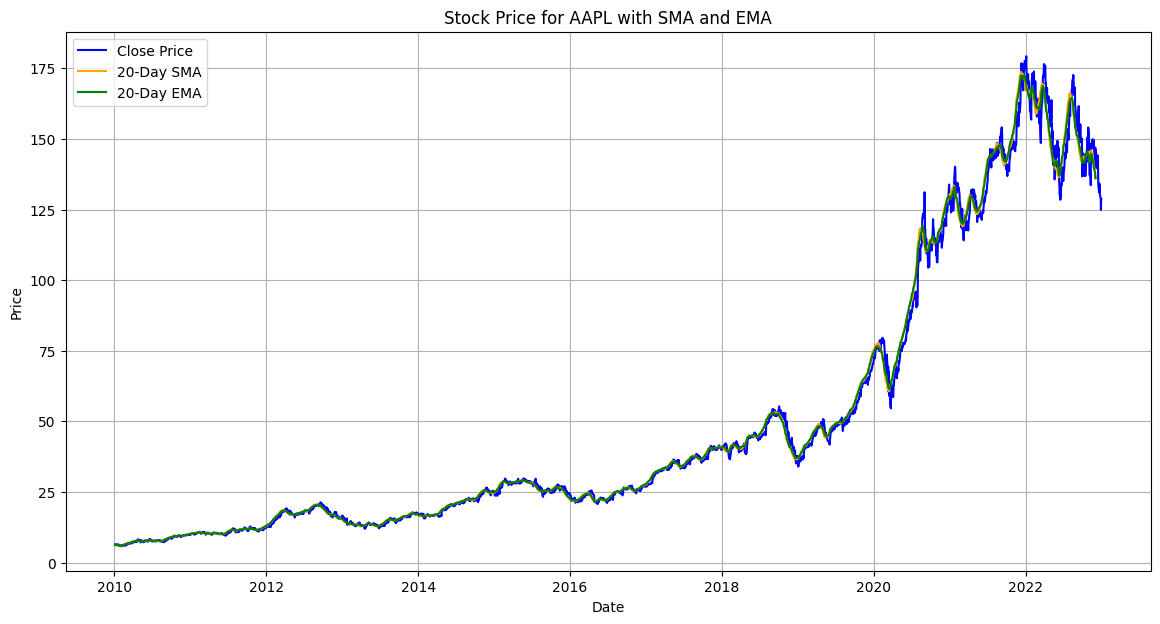

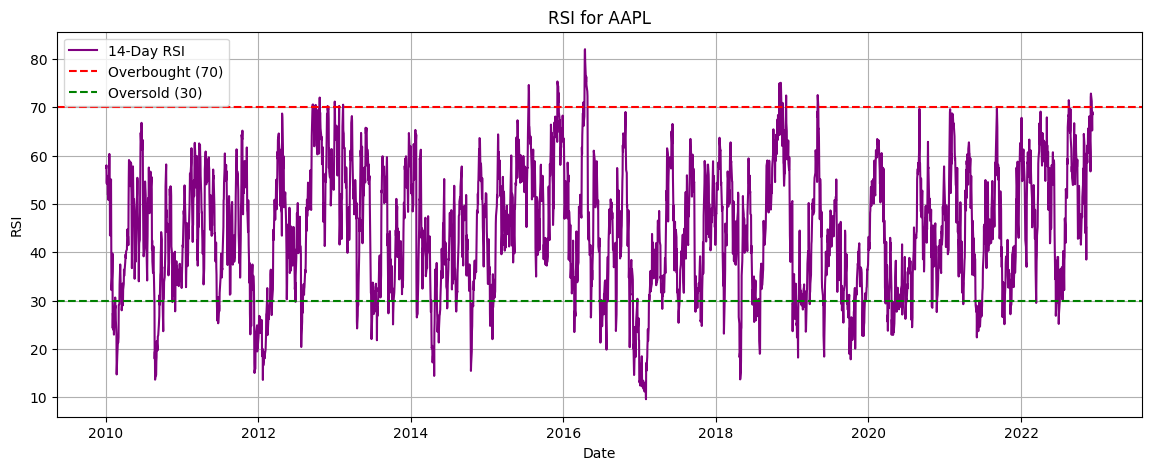

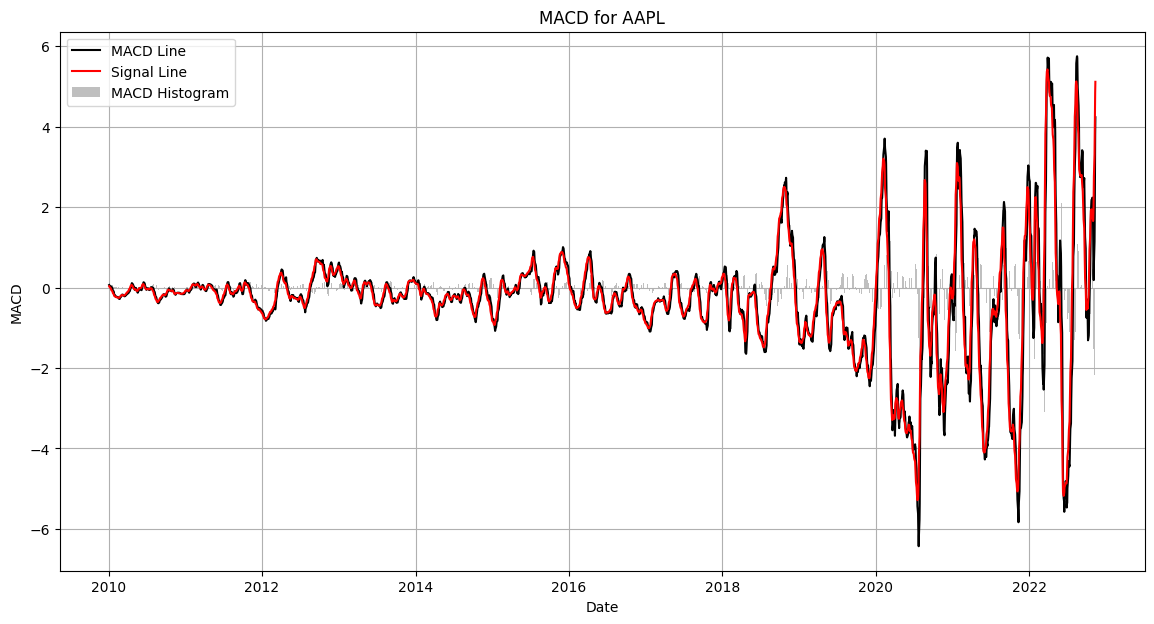

In [20]:
# Plotting
import matplotlib.pyplot as plt
from stock_analysis import load_data, plot_stock_data, plot_rsi, plot_macd
stock = 'AAPL'
fig = plot_stock_data(stock, df)
plt.show()

fig = plot_rsi(stock, df)
plt.show()

fig = plot_macd(stock, df)
plt.show()